In [1]:
import pandas as pd
import numpy as np
import random
from SimulatedSubjectData import *
import matplotlib.pyplot as plt
import pickle

In [2]:
def save_data(data, filename):
    """
    Save a dictionary where keys are ints or tuples, and values are lists of time series arrays.

    Parameters
    ----------
    data_dict : dict
        Keys: int or tuple (e.g., 1, (2,4))
        Values: list of lists or numpy arrays (time series data)
    filename : str
        Path to save file (should end in .pkl)
    """
    with open(filename, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
    print(f"Dictionary saved to {filename}")

def load_data(filename):
    """
    Load a dictionary saved with save_timeseries_dict().
    """
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [3]:
with open("words.pkl", "rb") as f:
    wordpool = pickle.load(f)

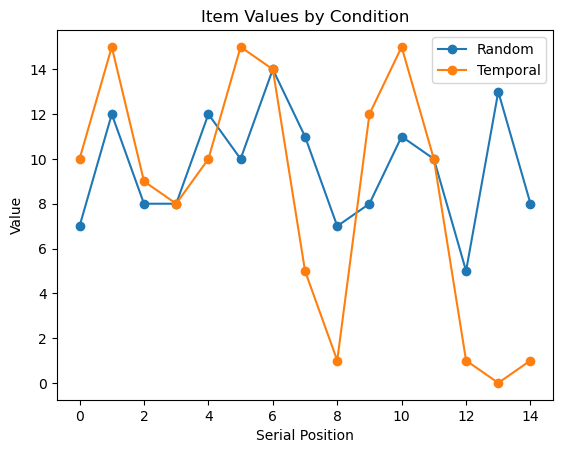

In [4]:
item_list_rand = ItemList(15, condition="Random")
item_list_temp = ItemList(15, condition="Temporal")

# Plot the values
plt.plot(item_list_rand.vals, label="Random", marker='o')
plt.plot(item_list_temp.vals, label="Temporal", marker='o')

plt.xlabel("Serial Position")
plt.ylabel("Value")
plt.title("Item Values by Condition")
plt.legend()
plt.show()

In [5]:
subjects_dict = load_data('subjects_data.pkl')

In [6]:
subjects_dict['LTP564']

{'first_recall_serialpos': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 'first_recall_probs': array([0.04878049, 0.07317073, 0.02439024, 0.07317073, 0.07317073,
        0.02439024, 0.02439024, 0.04878049, 0.        , 0.        ,
        0.02439024, 0.02439024, 0.        , 0.14634146, 0.41463415]),
 'temporal_clustering': 0.6239741181861808,
 'spatial_clustering': 0.4938078998390284,
 'crp_lags': array([-14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14]),
 'crp_probs': array([0.        , 0.        , 0.11111111, 0.14814815, 0.22857143,
        0.13043478, 0.04615385, 0.08974359, 0.13541667, 0.1010101 ,
        0.12037037, 0.0729927 , 0.1474359 , 0.13924051,        nan,
        0.21025641, 0.09836066, 0.11111111, 0.07821229, 0.0754717 ,
        0.07534247, 0.08527132, 0.02803738, 0.03846154, 0.02325581,
        0.01470588, 0.        , 0.        , 0.       

In [7]:
first_recall_probs = subjects_dict['LTP564']['first_recall_probs']
temporal_clustering = subjects_dict['LTP564']['temporal_clustering']
spatial_clustering = subjects_dict['LTP564']['spatial_clustering']
crp_probs = subjects_dict['LTP564']['crp_probs']

In [8]:
LTP564 = SimulatedSubjectData(subject='LTP564', first_recall=first_recall_probs, lag_crp=crp_probs, recall_rate=0.705, value_acc= 0.6)

In [9]:
pos = LTP564.generateLocations(r=1, n=len(LTP564.first_recall))
LTP564.generateLists(len(LTP564.first_recall), 3, wordpool=wordpool, pos=pos)

([ItemList (Temporal) - Length: 15
  Items: ['level', 'kickboard', 'pots', 'oatmeal', 'muffins', 'fabric', "dentist's_chair", 'leash', 'wrench', 'drill', 'aspirin', 'cake', 'bagels', 'apples', 'milk']
  Values: [6, 8, 11, 7, 7, 7, 5, 2, 3, 3, 7, 7, 4, 7, 10]
  Positions: [[0.1226473747908512, 0.5472127727569925], [0.013371469569582906, 0.059141966151393666], [0.5562597931847263, 0.5824442823307482], [0.7353758467221378, 0.8025659342714774], [0.817642413807033, 0.9641647455779776], [0.10267630660447324, 0.40726366306228867], [0.7629678398025507, 0.6747426195357389], [0.5765407998728751, 0.8738921582314646], [0.8074855098651997, 0.8873794669057734], [0.5132336039772882, 0.18722214790138925], [0.37711248117046836, 0.8270385141174507], [0.9145211621883523, 0.594164798079327], [0.46858279099366895, 0.8147958667189447], [0.8204298381299585, 0.8570794411001255], [0.4856249524268478, 0.9403378368064499]]
  GP params: {'decay_factor': 1.0, 'effect_strength': 1.0, 'mean_range': (4, 10), 'var_ran

In [10]:
def addCRPProbsCheck(crp_dict):
    """
    Returns the sum of probabilities in a CRP dictionary and checks if it exceeds 1.

    Args:
        crp_dict (dict): CRP dictionary {lag: prob}.

    Returns:
        float: Sum of probabilities.

    Raises:
        ValueError: If total probability exceeds 1.
    """
    total_prob = sum(crp_dict.values())
    if total_prob > 1.0 + 1e-8:  # allow tiny floating point error
        raise ValueError(f"Total probability exceeds 1: {total_prob}")
    return total_prob

In [11]:
crp = LTP564.convertCRP(LTP564.lag_crp)
print(crp)

{-14: 0.0, -13: 0.0, -12: 0.04811846818027798, -11: 0.06415795757370396, -10: 0.09898656311371469, -9: 0.05648689742902197, -8: 0.019987671397961624, -7: 0.038864916607147595, -6: 0.05864438309471378, -5: 0.04374406198207089, -4: 0.05212834052863447, -3: 0.03161067252718991, -2: 0.06384950585459963, -1: 0.06030035885882936, 1: 0.09105494747960294, 2: 0.04259667674975427, 3: 0.04811846818027798, 4: 0.03387110050678785, 5: 0.03268424253754731, 6: 0.032628276368818626, 7: 0.03692812674300403, 8: 0.012142043372593508, 9: 0.016656392831634687, 10: 0.010071307293546553, 11: 0.006368620788566203, 12: 0.0, 13: 0.0, 14: 0.0}


In [12]:
addCRPProbsCheck(crp)

0.9999999999999997

In [13]:
addCRPProbsCheck(crp)

0.9999999999999997

In [14]:
item_list1 = LTP564.item_lists[0]
proc = ItemProcessor(item_list1)

In [15]:
proc.hasItems()

True

In [16]:
crp = LTP564.convertCRP(LTP564.lag_crp)
item, val, pos, serialpos = proc.pickFirstItem(first_recall_probs)

In [17]:
first_recall_probs

array([0.04878049, 0.07317073, 0.02439024, 0.07317073, 0.07317073,
       0.02439024, 0.02439024, 0.04878049, 0.        , 0.        ,
       0.02439024, 0.02439024, 0.        , 0.14634146, 0.41463415])

In [18]:
proc.pickItem(crp, serialpos)

('kickboard', 8, array([0.01337147, 0.05914197]), 1, -10)

In [21]:
LTP564.generateData(list_len=15,num_lists=2, wordpool=wordpool, gen_pos=True, guess_by_subset=True, reset=True)

,experiment,item_name,item_val,list,recalled,recallpos,serialpos,subject,type,val_list_avg,val_guess,pos_x,pos_y
0,VCsim,gold,7,0,1,8,1,LTP564,WORD,9.933333,8,0.748846,0.086463
1,VCsim,fluoride,13,0,0,-1,2,LTP564,WORD,9.933333,8,0.668462,0.259744
2,VCsim,sandpaper,6,0,1,10,3,LTP564,WORD,9.933333,8,0.093879,0.670373
3,VCsim,lumber,7,0,1,11,4,LTP564,WORD,9.933333,8,0.400702,0.308185
4,VCsim,cage,6,0,1,2,5,LTP564,WORD,9.933333,8,0.116570,0.455517
5,VCsim,leash,9,0,0,-1,6,LTP564,WORD,9.933333,8,0.218590,0.394402
6,VCsim,puppets,5,0,1,1,7,LTP564,WORD,9.933333,8,0.236439,0.349553
7,VCsim,straws,9,0,1,9,8,LTP564,WORD,9.933333,8,0.531772,0.851034
8,VCsim,croissant,12,0,1,4,9,LTP564,WORD,9.933333,8,0.681614,0.842918
9,VCsim,chain,15,0,1,7,10,LTP564,WORD,9.933333,8,0.222336,0.055057
